## Intrusive Phone Calls

### Overview
Using data on the number of Do Not Call complaints (organized by state) made to the FTC over the past 5 years, we look to see if there is an optimal time to warn people about instrusive phone calls. We check the number of complaints per month to determine which times of the year have the most spam callers.

### Names
* Felix Chu (A15753620)
* Danny Fung (A13700439)
* Peter Huang (A92067166)
* Dan Tran (A13684358)
* Leon Wu (A11988491)

### Research Question
When should people be more aware of scam calls, depending on the time of the year and where they live, in order for them to not get scammed?

At what time of the year would it be most effective to inform people about the dangers of scam calls?

### Background & Prior Work
#### Background
* Scam callers can spoof their caller ID to make it look like they are from your area.
* Scam callers can target victims based on certain demographics such as race.
* Scam callers sometimes do not take people off their call lists when requested.

#### Prior Work
We found two projects similar to ours: **The Large-Scale Analysis of Technical Support Scams** and **The Correlates of Susceptibility to Scams in Older Adults Without Dementia**.

**The Large-Scale Analysis of Technical Support Scams** study learned that scammers abuse specific browser APIs to make it hard for users to navigate away from a technical support scam page, identified the social engineering techniques used, the remote administration tools abused, and the amount of money that scammers are charging. Technical support scammers were also based in call centers in English-speaking countries with low wages.

**The Correlates of Susceptibility to Scams in Older Adults Without Dementia** study found that the oldest old, persons with lower levels of cognitive function, lower psychological well being, and poorer health and financial literacy appeared to be the most susceptible to scams, independent of the level of education and income. There was no difference in susceptibility between males and females. This study identifies a number of factors that may put older adults at high risk of falling prey to scams, and suggests at least two modifiable factors—health and financial literacy and well-being—as potential targets for interventions to prevent victimization of older persons. The most robust psychosocial correlate of susceptibility to scams was psychological well-being. This indicates that positive functioning and outlook on one's life is associated with being less susceptible to being taken advantage of by a scammer.

#### References
1. https://arxiv.org/pdf/1607.06891.pdf
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3916958/pdf/nihms509695.pdf

### Hypothesis
People should be more aware of scam calls during the winter holidays. Our hypothesis is that scam callers target people the most during the winter holidays because many individuals are saving up for or purchasing gifts for loved ones. This is an optimal time to market a scam to people in the form of a gift.

### Dataset(s)
##### Dataset 1 - 2010_to_2015_dnc_complaints_by_month

* link to dataset: https://www.ftc.gov/site-information/open-government/data-sets
* 60 Observations
* This dataset contains the number of total complants (combination of recorded messages and requested entities), recorded messages, and requested entities. Each data row is the month of that year, with each cell being the total number of the type of complaints in that given month and year. The dataset was created by going to each year from 2010-2015 and combining them into a single file through excel sheets.
* For our research question, we chose to use: 
    1. Month
    2. Total number of complaints
* But other variables in this dataset include:
    1. Requested Entity to Stop Calling (number of people who requested to be put on the "Do Not Call" list)
    2. Recorded Message (number of calls that were recorded messages)
* Problems with this dataset:
    1. It is confined to the United States only.
    2. Data for more recent years couldn't be included because it doesn't show up in their recent excel sheets.
    3. It doesn't include more specific locations, such as states or cities.
    
##### Dataset 2
*include information about other datasets we use*
*include number of observations (rows), variables included, source*
*see dataset 1 for example*

### Setup

In [64]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import patsy

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [65]:
df_2018_dnc_state_complaints_5yr = pd.read_csv("csv_files/2018_DNC_State_Complaints_5yr.csv")
df_2018_dnc_state_complaints_calltype = pd.read_csv("csv_files/2018_DNC_State_Complaints_by_CallType.csv")
df_2018_dnc_state_complaints_topic = pd.read_csv("csv_files/2018_DNC_State_Complaints_by_Topic.csv")
df_2017_dnc_state_complaints_calltype = pd.read_csv("csv_files/2017_DNC_State_Complaints_by_CallType.csv")
df_2017_dnc_state_complaints_topic = pd.read_csv("csv_files/2017_DNC_State_Complaints_by_Topic.csv")
df_2010_to_2015_dnc_complaints_by_month = pd.read_csv("csv_files/2010_to_2015_dnc_complaints_by_month.csv")

state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]



### Data Cleaning
We cleaned the dataframe of 2010 to 2015 DNC complaints by month by separating the date with month and year.

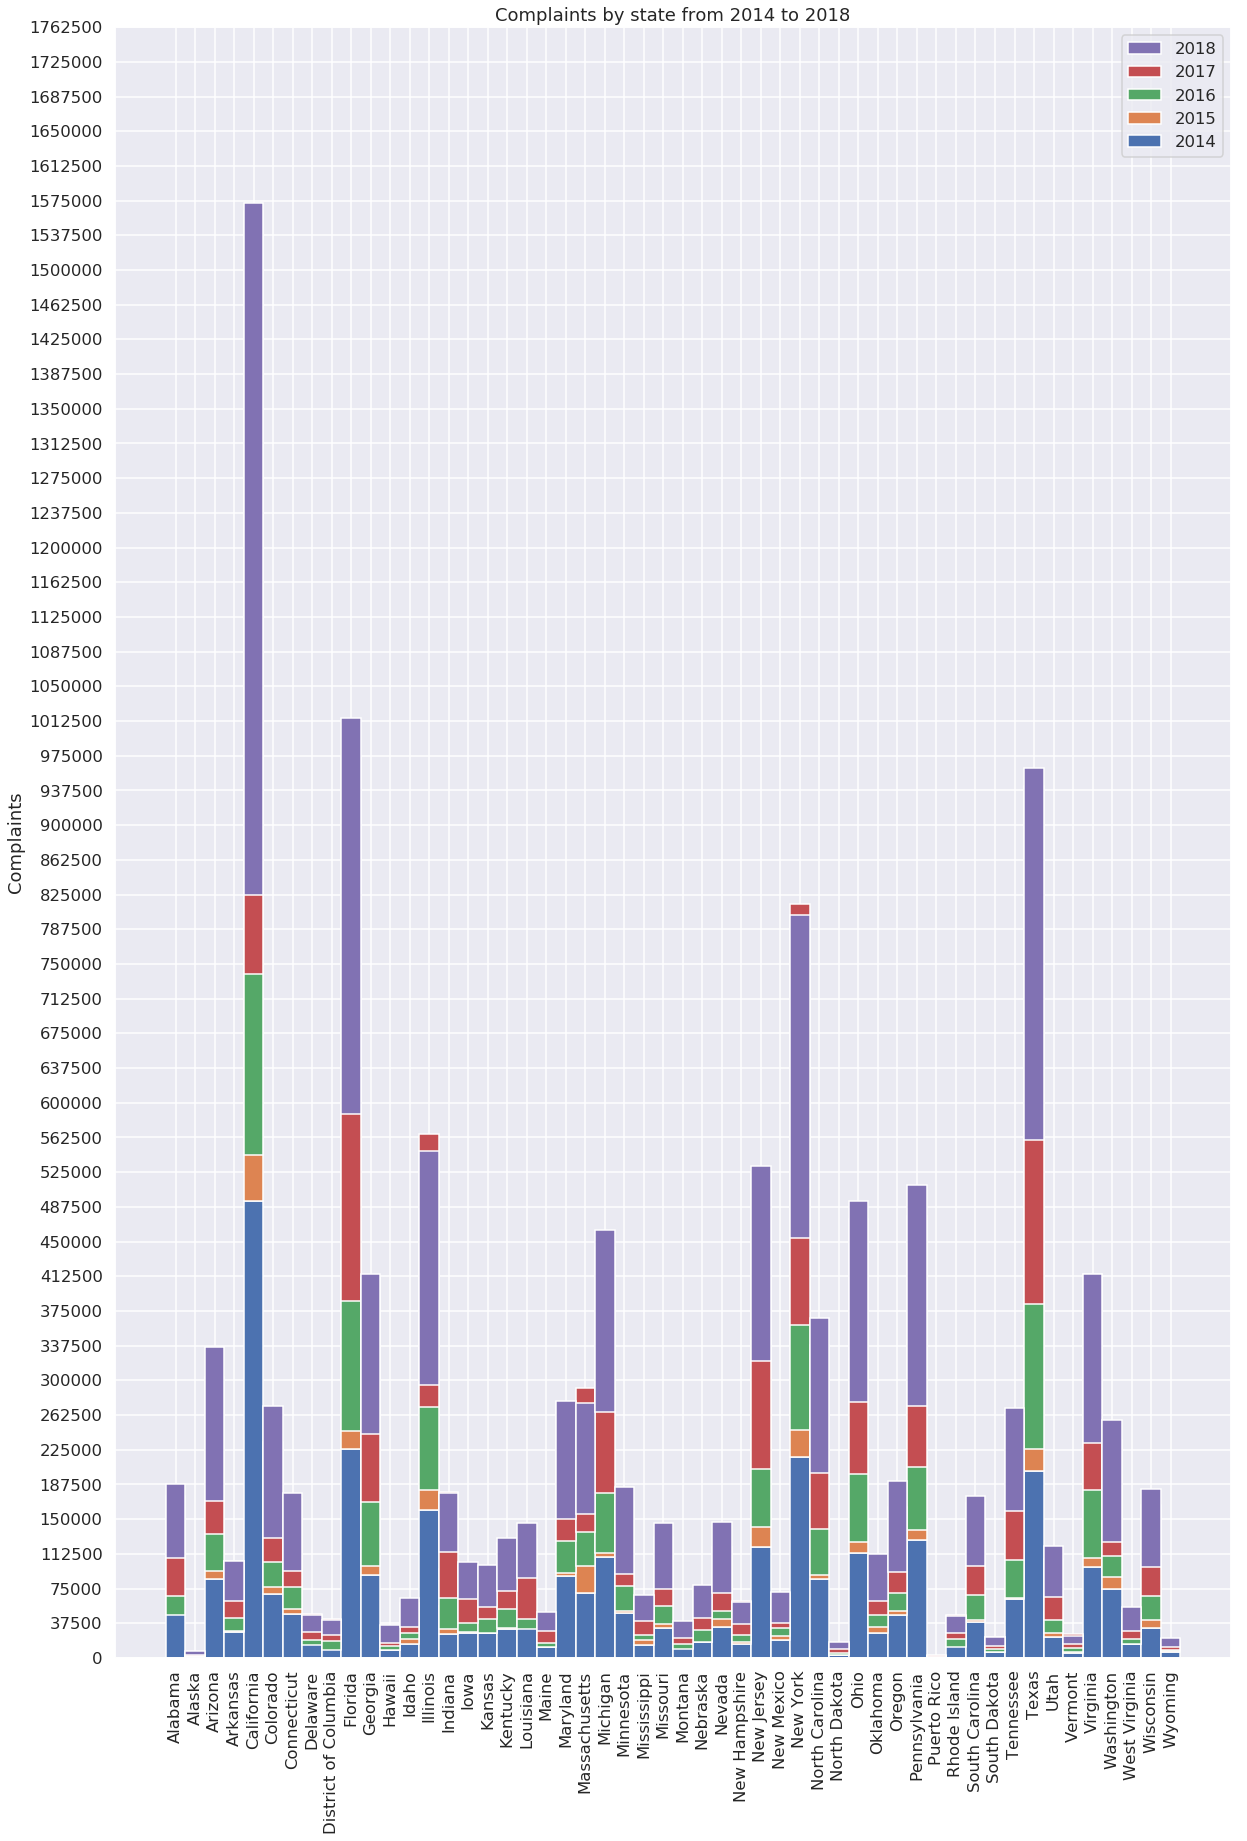

In [59]:
states_2010_to_2015 = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
wrang_df_2018_dnc_state_complaints_5yr = pd.DataFrame(columns=['ConsumerState', 'FY', 'Complaints'])
i = 0
for info in df_2018_dnc_state_complaints_5yr['Unnamed: 2']:
    if(str(info) != 'Complaints' and str(info) != 'nan'):
        wrang_df_2018_dnc_state_complaints_5yr = wrang_df_2018_dnc_state_complaints_5yr.append({'ConsumerState': df_2018_dnc_state_complaints_5yr['Complaints by Consumer State and Fiscal Year'][i], 'FY' : df_2018_dnc_state_complaints_5yr['Unnamed: 1'][i], 'Complaints' : df_2018_dnc_state_complaints_5yr['Unnamed: 2'][i]}, ignore_index=True)
    i = i + 1
i = 0
complaints_2014 = []
complaints_2015 = []
complaints_2016 = []
complaints_2017 = []
complaints_2018 = []

for year in wrang_df_2018_dnc_state_complaints_5yr['FY']:
    wrang_df_2018_dnc_state_complaints_5yr['Complaints'][i] = int(wrang_df_2018_dnc_state_complaints_5yr['Complaints'][i].replace(',',''))
    if(int(year) == 2014):
        complaints_2014.append(wrang_df_2018_dnc_state_complaints_5yr['Complaints'][i])
    elif(int(year) == 2015):
        complaints_2015.append(wrang_df_2018_dnc_state_complaints_5yr['Complaints'][i])
    elif(int(year) == 2016):
        complaints_2016.append(wrang_df_2018_dnc_state_complaints_5yr['Complaints'][i])
    elif(int(year) == 2017):
        complaints_2017.append(wrang_df_2018_dnc_state_complaints_5yr['Complaints'][i])
    elif(int(year) == 2018):
        complaints_2018.append(wrang_df_2018_dnc_state_complaints_5yr['Complaints'][i])
    i = i + 1

ind = np.arange(len(states_2010_to_2015))
width = 1
plt.figure(figsize=(20,30))
p1 = plt.bar(ind, complaints_2014, width)
p2 = plt.bar(ind, complaints_2015, width, bottom=complaints_2014)
p3 = plt.bar(ind, complaints_2016, width, bottom=complaints_2015)
p4 = plt.bar(ind, complaints_2017, width, bottom=complaints_2016)
p5 = plt.bar(ind, complaints_2018, width, bottom=complaints_2017)

plt.ylabel('Complaints')
plt.title('Complaints by state from 2014 to 2018')
plt.xticks(ind, states_2010_to_2015)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1800000, 37500))
plt.legend((p5[0], p4[0], p3[0], p2[0], p1[0]), ('2018', '2017', '2016', '2015', '2014'))

plt.show()


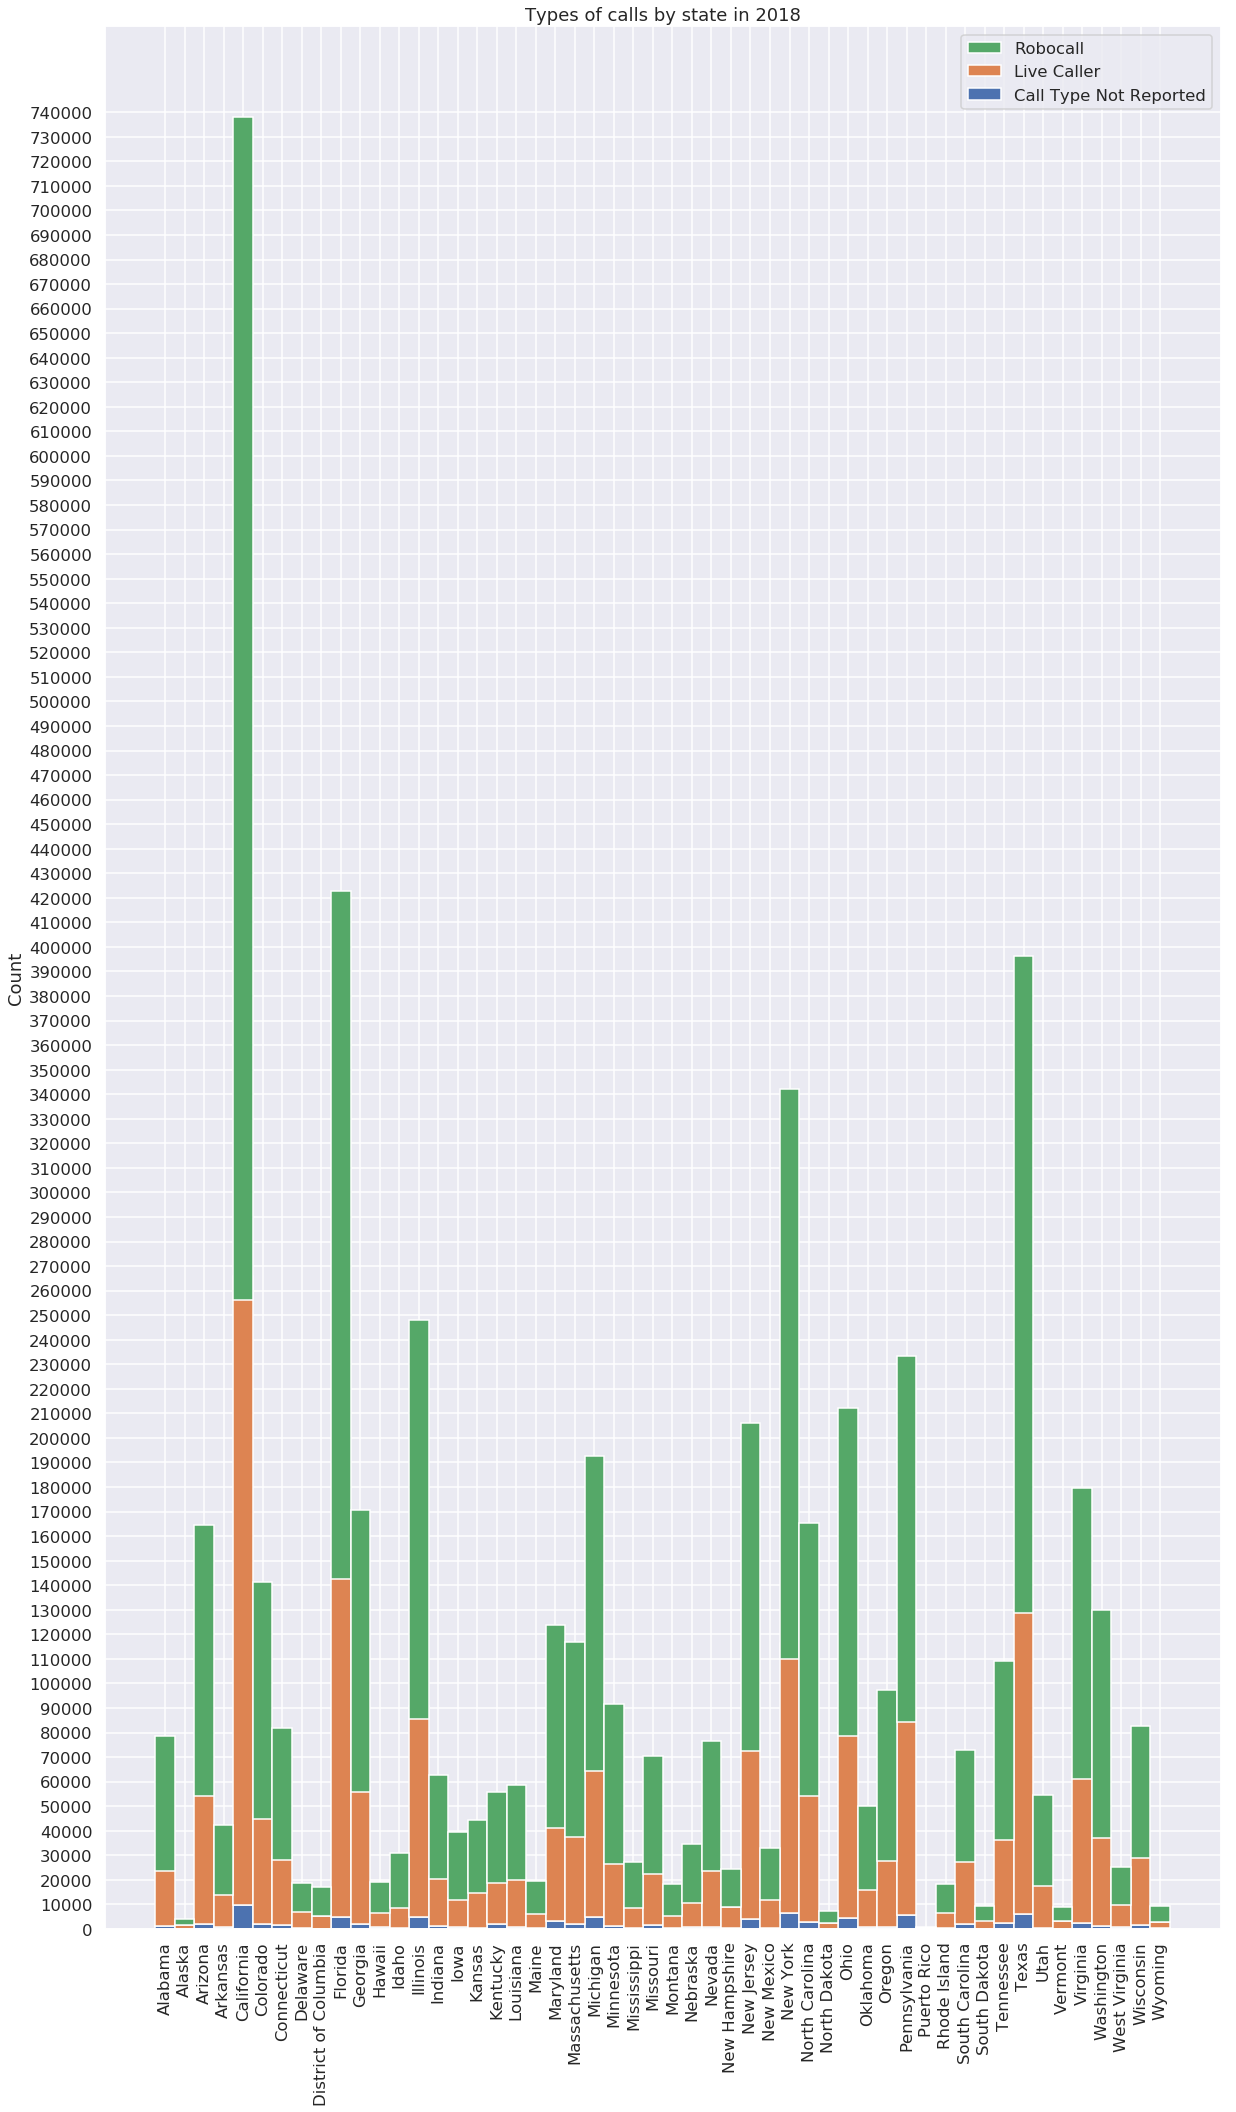

In [80]:
i = 0
wrang_df_2018_dnc_state_complaints_calltype = pd.DataFrame(columns=['ConsumerState', 'WasPreRecorded', 'Count'])
for info in df_2018_dnc_state_complaints_calltype['Unnamed: 2']:
    if(str(info) != 'Complaints' and str(info) != 'nan'):
            wrang_df_2018_dnc_state_complaints_calltype = wrang_df_2018_dnc_state_complaints_calltype.append({'ConsumerState': df_2018_dnc_state_complaints_calltype['FY 2018 Complaints by Consumer State and Call Type'][i], 'WasPreRecorded' : df_2018_dnc_state_complaints_calltype['Unnamed: 1'][i], 'Count' : df_2018_dnc_state_complaints_calltype['Unnamed: 2'][i]}, ignore_index=True)
    i = i + 1
i = 0
call_type_not_reported = []
live_caller = []
robocall = []

for call_type in wrang_df_2018_dnc_state_complaints_calltype['WasPreRecorded']:
    if(call_type == 'Call Type Not Reported'):
        call_type_not_reported.append(int(wrang_df_2018_dnc_state_complaints_calltype['Count'][i]))
    elif(call_type == 'Live Caller'):
        live_caller.append((int(wrang_df_2018_dnc_state_complaints_calltype['Count'][i])))
    elif(call_type == 'Robocall'):
        robocall.append((int(wrang_df_2018_dnc_state_complaints_calltype['Count'][i])))
    i = i + 1

ind = np.arange(len(states_2010_to_2015))
width = 1
plt.figure(figsize=(20,35))
p1 = plt.bar(ind, call_type_not_reported, width)
p2 = plt.bar(ind, live_caller, width, bottom=call_type_not_reported)
p3 = plt.bar(ind, robocall, width, bottom=live_caller)

plt.ylabel('Count')
plt.title('Types of calls by state in 2018')
plt.xticks(ind, states_2010_to_2015)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 750000, 10000))
plt.legend((p3[0], p2[0], p1[0]), ('Robocall', 'Live Caller', 'Call Type Not Reported'))

plt.show()

In [268]:
wrang_df_2018_dnc_state_complaints_topic = pd.DataFrame(columns=['FY 2018 Complaints by Consumer State and Topic', 'Topics', 'Number of Complaints'])
i = 0
for info in df_2018_dnc_state_complaints_topic['Unnamed: 2']:
    if(str(info) != 'Complaints' and str(info) != 'nan'):
        wrang_df_2018_dnc_state_complaints_topic = wrang_df_2018_dnc_state_complaints_topic.append({'FY 2018 Complaints by Consumer State and Topic': df_2018_dnc_state_complaints_topic['FY 2018 Complaints by Consumer State and Topic'][i], 'Topics': df_2018_dnc_state_complaints_topic['Unnamed: 1'][i], 'Number of Complaints' : df_2018_dnc_state_complaints_topic['Unnamed: 2'][i]}, ignore_index=True)
    i = i + 1
for state in state_names:
    print(state + ": " + str(len(wrang_df_2018_dnc_state_complaints_topic.loc[wrang_df_2018_dnc_state_complaints_topic['FY 2018 Complaints by Consumer State and Topic'] == state])) + " topics.")
wrang_df_2018_dnc_state_complaints_topic

#wrangled data is modified based roughly on 2017 counterpart

Alaska: 11 topics.
Alabama: 11 topics.
Arkansas: 11 topics.
American Samoa: 0 topics.
Arizona: 11 topics.
California: 11 topics.
Colorado: 11 topics.
Connecticut: 11 topics.
District of Columbia: 11 topics.
Delaware: 11 topics.
Florida: 11 topics.
Georgia: 11 topics.
Guam: 0 topics.
Hawaii: 11 topics.
Iowa: 11 topics.
Idaho: 11 topics.
Illinois: 11 topics.
Indiana: 11 topics.
Kansas: 11 topics.
Kentucky: 11 topics.
Louisiana: 11 topics.
Massachusetts: 11 topics.
Maryland: 11 topics.
Maine: 11 topics.
Michigan: 11 topics.
Minnesota: 11 topics.
Missouri: 11 topics.
Mississippi: 11 topics.
Montana: 11 topics.
North Carolina: 11 topics.
North Dakota: 11 topics.
Nebraska: 11 topics.
New Hampshire: 11 topics.
New Jersey: 11 topics.
New Mexico: 11 topics.
Nevada: 11 topics.
New York: 11 topics.
Ohio: 11 topics.
Oklahoma: 11 topics.
Oregon: 11 topics.
Pennsylvania: 11 topics.
Puerto Rico: 10 topics.
Rhode Island: 11 topics.
South Carolina: 11 topics.
South Dakota: 11 topics.
Tennessee: 11 topi

,FY 2018 Complaints by Consumer State and Topic,Topics,Number of Complaints
0,Alabama,Computer & technical support,1457
1,Alabama,"Energy, solar, & utilities",132
2,Alabama,Home improvement & cleaning,639
...,...,...,...
568,Wyoming,Vacation & timeshares,246
569,Wyoming,Warranties & protection plans,424
570,Wyoming,Work from home,93


In [85]:
wrang_df_2017_dnc_state_complaints_calltype = df_2017_dnc_state_complaints_calltype.drop(columns='FY')
#i = 0
#call_type_not_reported = []
#live_caller = []
#robocall = []

#for call_type in wrang_df_2017_dnc_state_complaints_calltype['WasPreRecorded']:
#    if(wrang_df_2017_dnc_state_complaints_calltype['ConsumerState'][i] != 'NONE'):
#        if(call_type == 'Call Type Not Reported'):
#            call_type_not_reported.append(int(wrang_df_2017_dnc_state_complaints_calltype['Count'][i]))
#        elif(call_type == 'Live Caller'):
#            live_caller.append((int(wrang_df_2017_dnc_state_complaints_calltype['Count'][i])))
#        elif(call_type == 'Robocall'):
#            robocall.append((int(wrang_df_2017_dnc_state_complaints_calltype['Count'][i])))
#    i = i + 1

#print(len(call_type_not_reported))
#print(len(live_caller))
#print(len(robocall))
    
#ind = np.arange(len(states_2010_to_2015))
#width = 1
#plt.figure(figsize=(20,35))
#p1 = plt.bar(ind, call_type_not_reported, width)
#p2 = plt.bar(ind, live_caller, width, bottom=call_type_not_reported)
#p3 = plt.bar(ind, robocall, width, bottom=live_caller)

#plt.ylabel('Count')
#plt.title('Types of calls by state in 2017')
#plt.xticks(ind, states_2010_to_2015)
#plt.xticks(rotation=90)
#plt.yticks(np.arange(0, 750000, 10000))
#plt.legend((p3[0], p2[0], p1[0]), ('Robocall', 'Live Caller', 'Call Type Not Reported'))

#plt.show()

In [270]:
wrang_df_2017_dnc_state_complaints_topic = pd.DataFrame(columns=['State', 'Top topics', 'Number of Complaints'])
i = 0
for info in df_2017_dnc_state_complaints_topic['Unnamed: 1']:
    potential_state = df_2017_dnc_state_complaints_topic['TOP TOPICS BY STATE'][i].strip()
    if(info is np.nan and potential_state in state_names):
        state = potential_state
    elif(df_2017_dnc_state_complaints_topic['Unnamed: 1'][i] != 'Complaints' and str(df_2017_dnc_state_complaints_topic['Unnamed: 1'][i]) != 'nan'):
        wrang_df_2017_dnc_state_complaints_topic = wrang_df_2017_dnc_state_complaints_topic.append({'State': state, 'Top topics': df_2017_dnc_state_complaints_topic['TOP TOPICS BY STATE'][i], 'Number of Complaints' : int(df_2017_dnc_state_complaints_topic['Unnamed: 1'][i].replace(',',''))}, ignore_index=True)
    i = i + 1
for state in state_names:
    print(state + ": " + str(len(wrang_df_2017_dnc_state_complaints_topic.loc[wrang_df_2017_dnc_state_complaints_topic['State'] == state])) + " topics.")
wrang_df_2017_dnc_state_complaints_topic

Alaska: 10 topics.
Alabama: 10 topics.
Arkansas: 10 topics.
American Samoa: 0 topics.
Arizona: 10 topics.
California: 10 topics.
Colorado: 10 topics.
Connecticut: 10 topics.
District of Columbia: 10 topics.
Delaware: 10 topics.
Florida: 10 topics.
Georgia: 10 topics.
Guam: 0 topics.
Hawaii: 10 topics.
Iowa: 10 topics.
Idaho: 10 topics.
Illinois: 10 topics.
Indiana: 10 topics.
Kansas: 10 topics.
Kentucky: 10 topics.
Louisiana: 10 topics.
Massachusetts: 10 topics.
Maryland: 10 topics.
Maine: 10 topics.
Michigan: 10 topics.
Minnesota: 10 topics.
Missouri: 10 topics.
Mississippi: 10 topics.
Montana: 10 topics.
North Carolina: 10 topics.
North Dakota: 10 topics.
Nebraska: 10 topics.
New Hampshire: 10 topics.
New Jersey: 10 topics.
New Mexico: 10 topics.
Nevada: 10 topics.
New York: 10 topics.
Ohio: 10 topics.
Oklahoma: 10 topics.
Oregon: 10 topics.
Pennsylvania: 10 topics.
Puerto Rico: 10 topics.
Rhode Island: 10 topics.
South Carolina: 10 topics.
South Dakota: 10 topics.
Tennessee: 10 topi

,State,Top topics,Number of Complaints
0,Alabama,Reducing debt,13673
1,Alabama,Warranties & protection plans,5036
2,Alabama,Home security & alarms,3973
...,...,...,...
518,Wyoming,Work from home,154
519,Wyoming,Home security & alarms,30
520,Wyoming,Home improvement & cleaning,28


In [271]:
wrang_df_2010_to_2015_dnc_complaints_by_month = pd.DataFrame(columns=['Month', 'Year', 'Total Complaints', 'Requested Entity to Stop Calling', 'Recorded Message'])
i = 0
for subject_month in df_2010_to_2015_dnc_complaints_by_month['Unnamed: 0']:
    month = subject_month[0:3]
    year = '20'+subject_month[4:6].replace('-','1')
    total_complaints = df_2010_to_2015_dnc_complaints_by_month['Total Complaints'][i].replace(',', '')
    requested = df_2010_to_2015_dnc_complaints_by_month['Requested Entity to Stop Calling'][i].replace(',', '')
    recorded = df_2010_to_2015_dnc_complaints_by_month['Recorded Message'][i].replace(',', '')
    wrang_df_2010_to_2015_dnc_complaints_by_month = wrang_df_2010_to_2015_dnc_complaints_by_month.append({'Month': month, 'Year': year, 'Total Complaints': total_complaints, 'Requested Entity to Stop Calling': requested, 'Recorded Message': recorded}, ignore_index=True)
    i = i + 1
wrang_df_2010_to_2015_dnc_complaints_by_month

,Month,Year,Total Complaints,Requested Entity to Stop Calling,Recorded Message
0,Oct,2010,147617,71226,65071
1,Nov,2010,144027,69908,64126
2,Dec,2010,137299,66255,60349
...,...,...,...,...,...
57,Jul,2015,322865,194336,161702
58,Aug,2015,316044,187173,155551
59,Sep,2015,315073,188320,151526


### Data Analysis

Jan: 1367986
Feb: 1397948
Mar: 1540240
Apr: 1464242
May: 1409354
Jun: 1419308
Jul: 1474047
Aug: 1549973
Sep: 1525764
Oct: 1247479
Nov: 1165743
Dec: 1119611


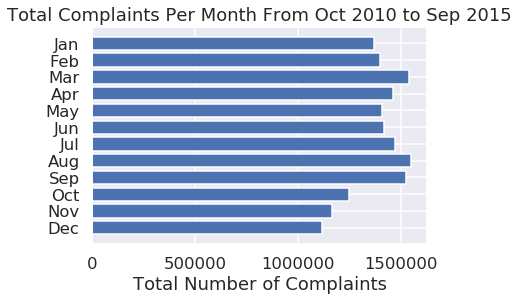

In [272]:
i = 0
months = df_2010_to_2015_dnc_complaints_by_month['Unnamed: 0']
month_arr = [['Jan', 0], ['Feb', 0], ['Mar', 0], ['Apr', 0], ['May', 0], ['Jun', 0], ['Jul', 0], ['Aug', 0], ['Sep', 0], ['Oct', 0], ['Nov', 0], ['Dec', 0]]
performance = []
for month in months:
    for com_month in month_arr:
        if(month[0:3] == com_month[0]):
            str_in = df_2010_to_2015_dnc_complaints_by_month['Total Complaints'][i].replace(',', '')
            com_month[1] += int(str_in)
    i = i + 1
i = 0
for month in month_arr:
    performance.insert(0,month[1])
    print(str(month[0])+": "+str(month[1]))
objects = ('Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan')
y_pos = np.arange(len(objects))
plt.barh(y_pos, performance, align='center', alpha=1)
plt.yticks(y_pos, objects)
plt.xlabel('Total Number of Complaints')
plt.title('Total Complaints Per Month From Oct 2010 to Sep 2015')

plt.show()

### Descriptive / Exploratory:
The sample size of this data is large, but there is a small issue with the data collection. All the data is collected by people volunteering data - meaning they had to submit a complaint to the FTC in an attempt to get action taken against these unwanted calls. However, this means that drops in total complaints may not mean there actually were less unwanted calls, it may also mean that people were simply less willing to submit a complaint that that time.

The size of our data spans many more observations than columns. We have alot of data about unwanted calls - organized by State, Type of Call, and Topic of Call. However, our variables are simple: we just use the number of said calls. In terms of missing data, there is the aformentioned data that were not reported by people. There also is, in the case of "Topic of Call" the chance that they reported an unwanted call, but left out the topic. The same applies to "Call of Type"; some people did not report whether the caller was a robot or a human. 

In terms of complaints per month, the data appears to be bimodal, with a peak around March and a second one in August. The number of complaints shows a clear dropoff in the fall and winter months of October to February. There are also a lot more complaints in 2015 than 2010, and since we're dealing with total number of complaints, more recent years have more of an effect on the graph than earlier ones.*exploratory: look for missing values/outlier values,calculate numerical summaries, generate plots and tables to explore realtionships, if necessary transform variables*

In [273]:
df_by_month = pd.DataFrame([x[1:] for x in month_arr], index=[x[0] for x in month_arr], columns=['UnwantedCalls'])
df_by_month['Month'] = range(1,13)
avg = df_by_month['UnwantedCalls'].mean()
#avg'd out the number of complaints to avoid warning
df_by_month['UnwantedCalls'] = df_by_month['UnwantedCalls'].div(avg)

#print(avg)
#print(df_by_month)

outcome, predictors = patsy.dmatrices('Month ~ UnwantedCalls', df_by_month)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  Month   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     4.051
Date:                Thu, 06 Jun 2019   Prob (F-statistic):             0.0718
Time:                        22:28:39   Log-Likelihood:                -29.854
No. Observations:                  12   AIC:                             63.71
Df Residuals:                      10   BIC:                             64.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        25.3322      9.401      2.695

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


### Ethics & Privacy
The most concerning ethical consideration for our study is that our data analysis could potentially make it easier for scammers to find victims. Since we analyze our data to find the best times for scammers to strike, this may give scammers hints for when they should operate. We also acknowledge the fact that all the data we use is self-reported. This means that our analysis may not necessarily be representative of a particular group since some may choose to not report calls. Our data also has some bias in the sense that it is aggregated by state. The data is not nearly as narrow if compared to data by cities. We are unable to take into account whether population density could affect the number of reported calls. For instance, urban areas might have a higher number of reported calls over rural areas.

In terms of privacy, data from our sources is anonymized. In regards to the Safe Harbor method, none of the data we collected had any data which would compromise privacy in the first place. All the data used is categorized either by state or by calltype and does not include any personal data such as: Names, geographic subdivisions smaller than a state, birth dates, etc. In fact, all the data is already associated to a state and not to any particular individual, and thus contains no information which could be used to identify what entry or information any one person gave to the FTC which we are using here.

### Conclusion & Discussion
Based on the number of complaints, assuming the number of complaints correlates with the frequency of calls, the data does not support our hypothesis. However, the season with the smallest number of calls is during the Fall, which contradicts our hypothesis due to the fact that we believe that scammers would want to target towards shoppers that prepare for holiday gifts. As a result, our correlational findings can help groups create more efficient funding towards countermeasures on scamming, such as informing people to not fall for scams during most of the year. By understanding how every season but Fall has a high number of complaints, we can focus less attention towards the Fall season, and focus on a higher frequency of announcements to prevent scammers to take advantage of the unaware. 

Although our findings can figure out when scammers are more active, we don't know where they are most active. If we are able to narrow the total complaints of the country to certain states, we can create more efficient countermeasures against scammers. However, the dataset(s) we have could only focus on the United States in general, and we have no way to narrow it down. These findings are also slightly outdated (focusing from 2010 to 2015), due to the later years not containing temporal data on the number of complaints. There could be measures currently that could change the frequency of Do Not Call Complaints on each month. We don't know if 2019 could have a higher frequency of Do Not Call Complaints this Fall. 